In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("force2020_data_unsupervised_learning.csv", index_col = "DEPTH_MD")

In [3]:
df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [4]:
df.dropna(inplace=True)

In [5]:
scaler = StandardScaler()

In [73]:
df[["RHOB_T", "NPHI_T", "GR_T", "PEF_T", "DTC_T"]] = scaler.fit_transform(df[["RHOB", "NPHI", "GR", "PEF", "DTC"]])# append the Transforms to the dataset.

In [74]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, "o-")
    plt.xlabel(["Number of Clusters"])
    plt.ylabel(["Inertia"])
    plt.grid(True)
    plt.show()

In [75]:
#optimise_k_means(df[["RHOB_T", "NPHI_T"]], 10)

In [76]:
kmeans = KMeans(n_clusters=3)

In [77]:
kmeans.fit(df[["NPHI_T", "RHOB_T"]])

KMeans(n_clusters=3)

In [90]:
df["kmeans_3"] = kmeans.labels_

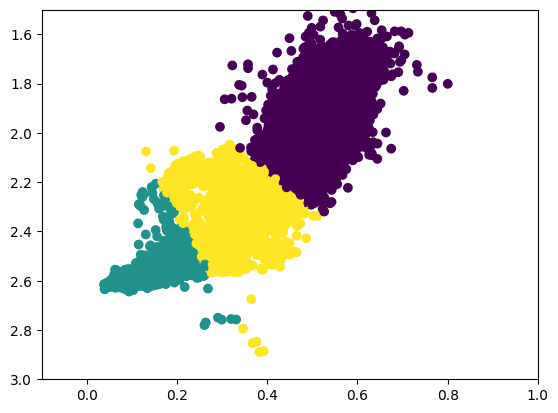

In [79]:
plt.scatter(x=df["NPHI"], y=df["RHOB"], c=df["kmeans_3"])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

In [93]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[["RHOB_T", "NPHI_T"]])
    df[f"KMeans_{k}"] = kmeans.labels_

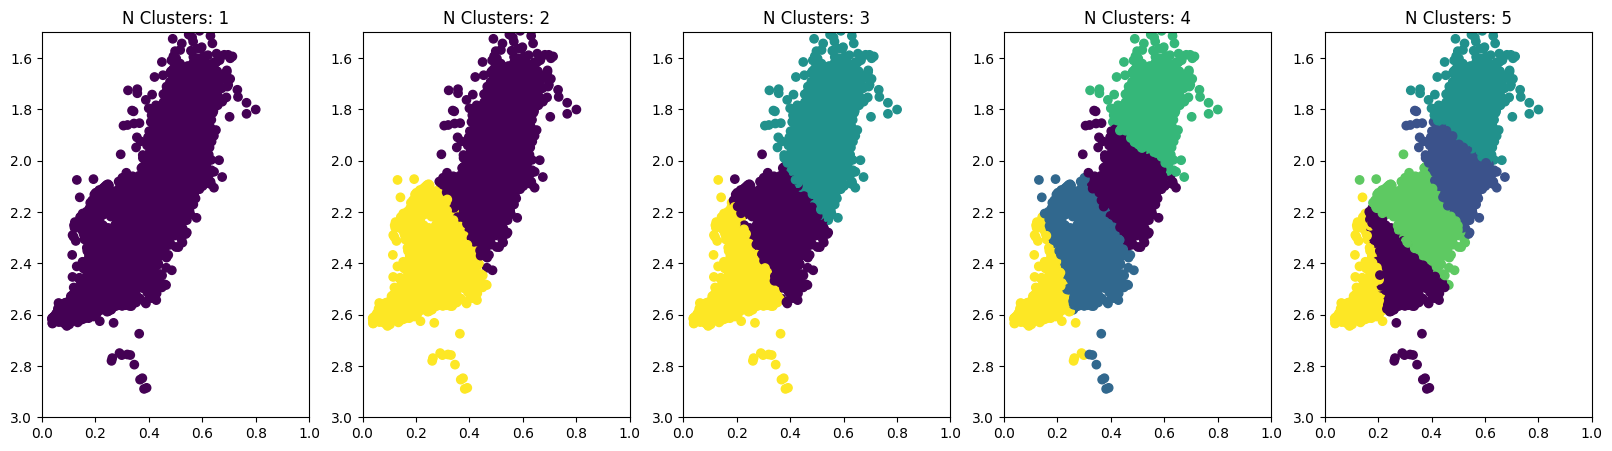

In [94]:
fig, axs = plt.subplots(nrows=1, ncols = 5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df["NPHI"], y=df["RHOB"], c=df[f"KMeans_{i}"])
    ax.set_ylim(3, 1.5)
    ax.set_xlim(0, 1)
    ax.set_title(f"N Clusters: {i}")